# Question 1

In [2]:
import scipy.stats as stats
import matplotlib.pyplot as plt
import numpy as np
import scipy.integrate as integrate

In [33]:
N = 30
x1 = stats.norm.rvs(size=N)
x2 = stats.norm.rvs(2, 4, size = N)
x3 = stats.uniform.rvs(0, 1, size = N)
x4 = x3*x3

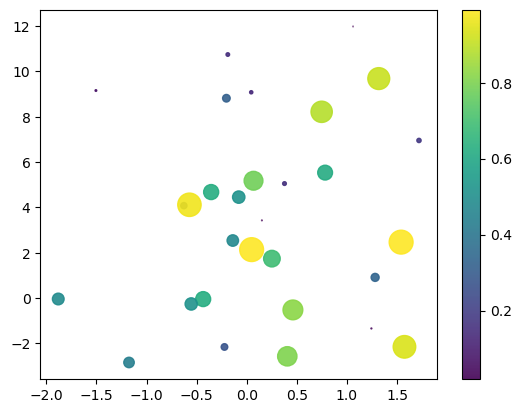

In [34]:
plt.scatter(x1, x2, c=x3, s=300*x4, alpha=0.9)
plt.colorbar()
plt.show()

#### Among the 4 dimensions the 4th one is dependent on the 3rd, this dependancy is captured in the above bubble (scatter) plot. As the the size of the bubbles increase (captured by 3rd dimension) so will color intensity (captured by 4th dimension), changing from dark blue to yellow.

# Question 2

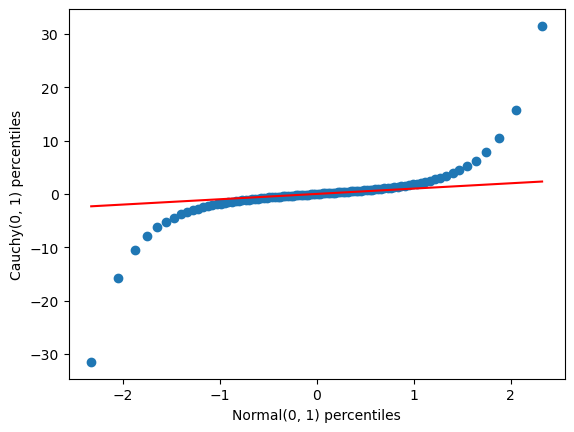

In [5]:
# soln from Fredrick

percents =  np.linspace(0, 1, 100)
percentile1 = stats.norm.ppf(percents)
percentile2 = stats.cauchy.ppf(percents)

plt.plot(percentile1, percentile2, 'o')
plt.plot(percentile1, percentile1, color='red')
plt.xlabel("Normal(0, 1) percentiles")
plt.ylabel("Cauchy(0, 1) percentiles")
plt.show()

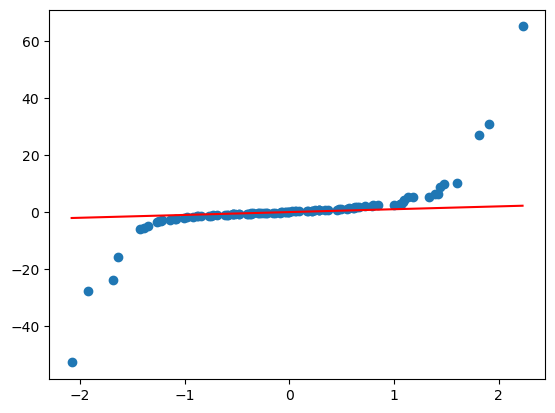

In [7]:
N = 100
seed = 181

x1 = stats.norm.rvs(size=N, random_state=seed)
x2 = stats.cauchy.rvs(size=N, random_state=seed)

p = np.linspace(0, 100, 100)

y1 = np.percentile(x1, p)
y2 = np.percentile(x2, p)

plt.plot(y1,y2, 'o')
plt.plot(y1,y1, color='red')
plt.show()

#### Q–Q plot is a probability plot, a graphical method for comparing two probability distributions by plotting their quantiles against each other. A point on the plot corresponds to one of the quantiles of the second distribution plotted against the same quantile of the first distribution. Here, as the Cauchy distribution has fatter tails (as in there is higer probablity of finiding data at the tails of Cauchy distribution than at the tails of a normal distribution of same mean or an uniform skew) which is indicated in QQ plot by the blue points deviating from diagonal (red line) at both ends.

# Question 3

In [36]:
N=10000
x1 = stats.beta.rvs(2, 8, size=N)
x2 = stats.beta.rvs(8, 2, size=N)

x = np.linspace(0, 1, 100)

In [37]:
def fun(x, t):
    return stats.beta.pdf(x, a=2, b=8) * stats.beta.pdf(t-x, a=8, b=2)

In [38]:
l = []
for t in np.linspace(0, 2, 100):
    l.append(integrate.quad(fun, 0, 2, args=(t,))[0])

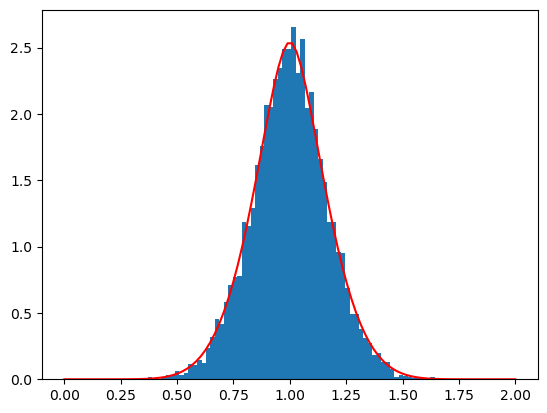

In [39]:
plt.hist(x1+x2, density=True, bins='auto')
plt.plot(np.linspace(0, 2, 100), l, color='red')
plt.show()

### sum of Samples from 2 different distributions p1+p2 will give similar results to the samples obtianed form applying the convolution [intgral(f(x)*f(t-x))] opertation on two beta distributions (ie. to get sum of the distributions).

# Question 4

In [2]:
def sample_mean(m, n):
    return [np.mean(stats.norm.rvs(0, 1, size=m)) for _ in range(n)]

In [3]:
n = 10000

a = sample_mean(10, n)

b = sample_mean(100, n)

c = sample_mean(1000, n)

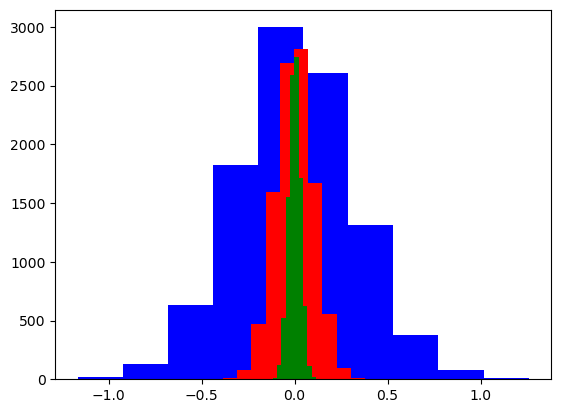

In [4]:
plt.hist(a, color='blue')
plt.hist(b, color='red')
plt.hist(c, color='green')
plt.show()

In [43]:
class sample_mean_distribution():
    def __init__(self, m):
        self.m = m
    def sample_mean(self, x): 
        return stats.norm.pdf(x, 0, (1/self.m) * np.sqrt(self.m))

In [44]:
x = np.linspace(-1, 1, 10000)

a = sample_mean_distribution(10).sample_mean(x)

b = sample_mean_distribution(100).sample_mean(x)

c = sample_mean_distribution(1000).sample_mean(x)

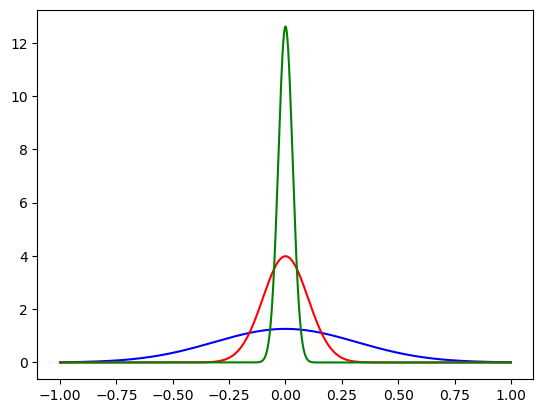

In [45]:
plt.plot(x, a, color='blue')
plt.plot(x, b, color='red')
plt.plot(x, c, color='green')
plt.show()

### Sampling means of 1000 (grater in number) standard normal distributions leads to a narrow spred represented by the green color both on the histogram and pdf plots as many of the samples are closely centered about the mean 0 (ie. high frequence) hence we see a sharp peak for 1000. On the other hand, sampling means of 10 distribution will result in more of a wider and shorter distribution. Although the shapes of the distribution may vary, they're still centered about the same mean 0. 

### 